# FEVER

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
import json

files = ['paper_dev.jsonl', 'paper_test.jsonl', 'shared_task_dev.jsonl', 'train.jsonl']

data = []

for file_name in files:
    with open(f'data/{file_name}', 'r') as f:
        for line in f.readlines():
            data.append(json.loads(line))

df = pd.DataFrame(data)

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(185445, 5)

Overview of the data:

In [6]:
df.head()

,id,verifiable,label,claim,evidence
0,91198,NOT VERIFIABLE,NOT ENOUGH INFO,Colin Kaepernick became a starting quarterback...,"[[[108548, None, None, None]]]"
1,194462,NOT VERIFIABLE,NOT ENOUGH INFO,Tilda Swinton is a vegan.,"[[[227768, None, None, None]]]"
2,137334,VERIFIABLE,SUPPORTS,Fox 2000 Pictures released the film Soul Food.,"[[[289914, 283015, Soul_Food_-LRB-film-RRB-, 0..."
3,166626,NOT VERIFIABLE,NOT ENOUGH INFO,Anne Rice was born in New Jersey.,"[[[191656, None, None, None], [191657, None, N..."
4,111897,VERIFIABLE,REFUTES,Telemundo is a English-language television net...,"[[[131371, 146144, Telemundo, 0]], [[131371, 1..."


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

id             int64
verifiable    object
label         object
claim         object
evidence      object
dtype: object

### Basic characteristics

In [8]:
df.describe()

,id
count,185445.000000
mean,113960.744458
std,66359.067544
min,3.000000
25%,56498.000000
50%,113255.000000
75%,171483.000000
max,229449.000000


In [9]:
# Attribute 'evidence' not used, takes too much time to compute
df[['id', 'verifiable', 'label', 'claim']].describe(exclude=[np.number])

,verifiable,label,claim
count,185445,185445,185445
unique,2,3,155139
top,VERIFIABLE,SUPPORTS,International Relations only includes the ente...
freq,136474,93367,33


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df[['id', 'verifiable', 'label', 'claim']])

### Missing values

Analysis of missing values in attributes:


Missing values plot (inverse logic, plot is showing how many values are not NaN):


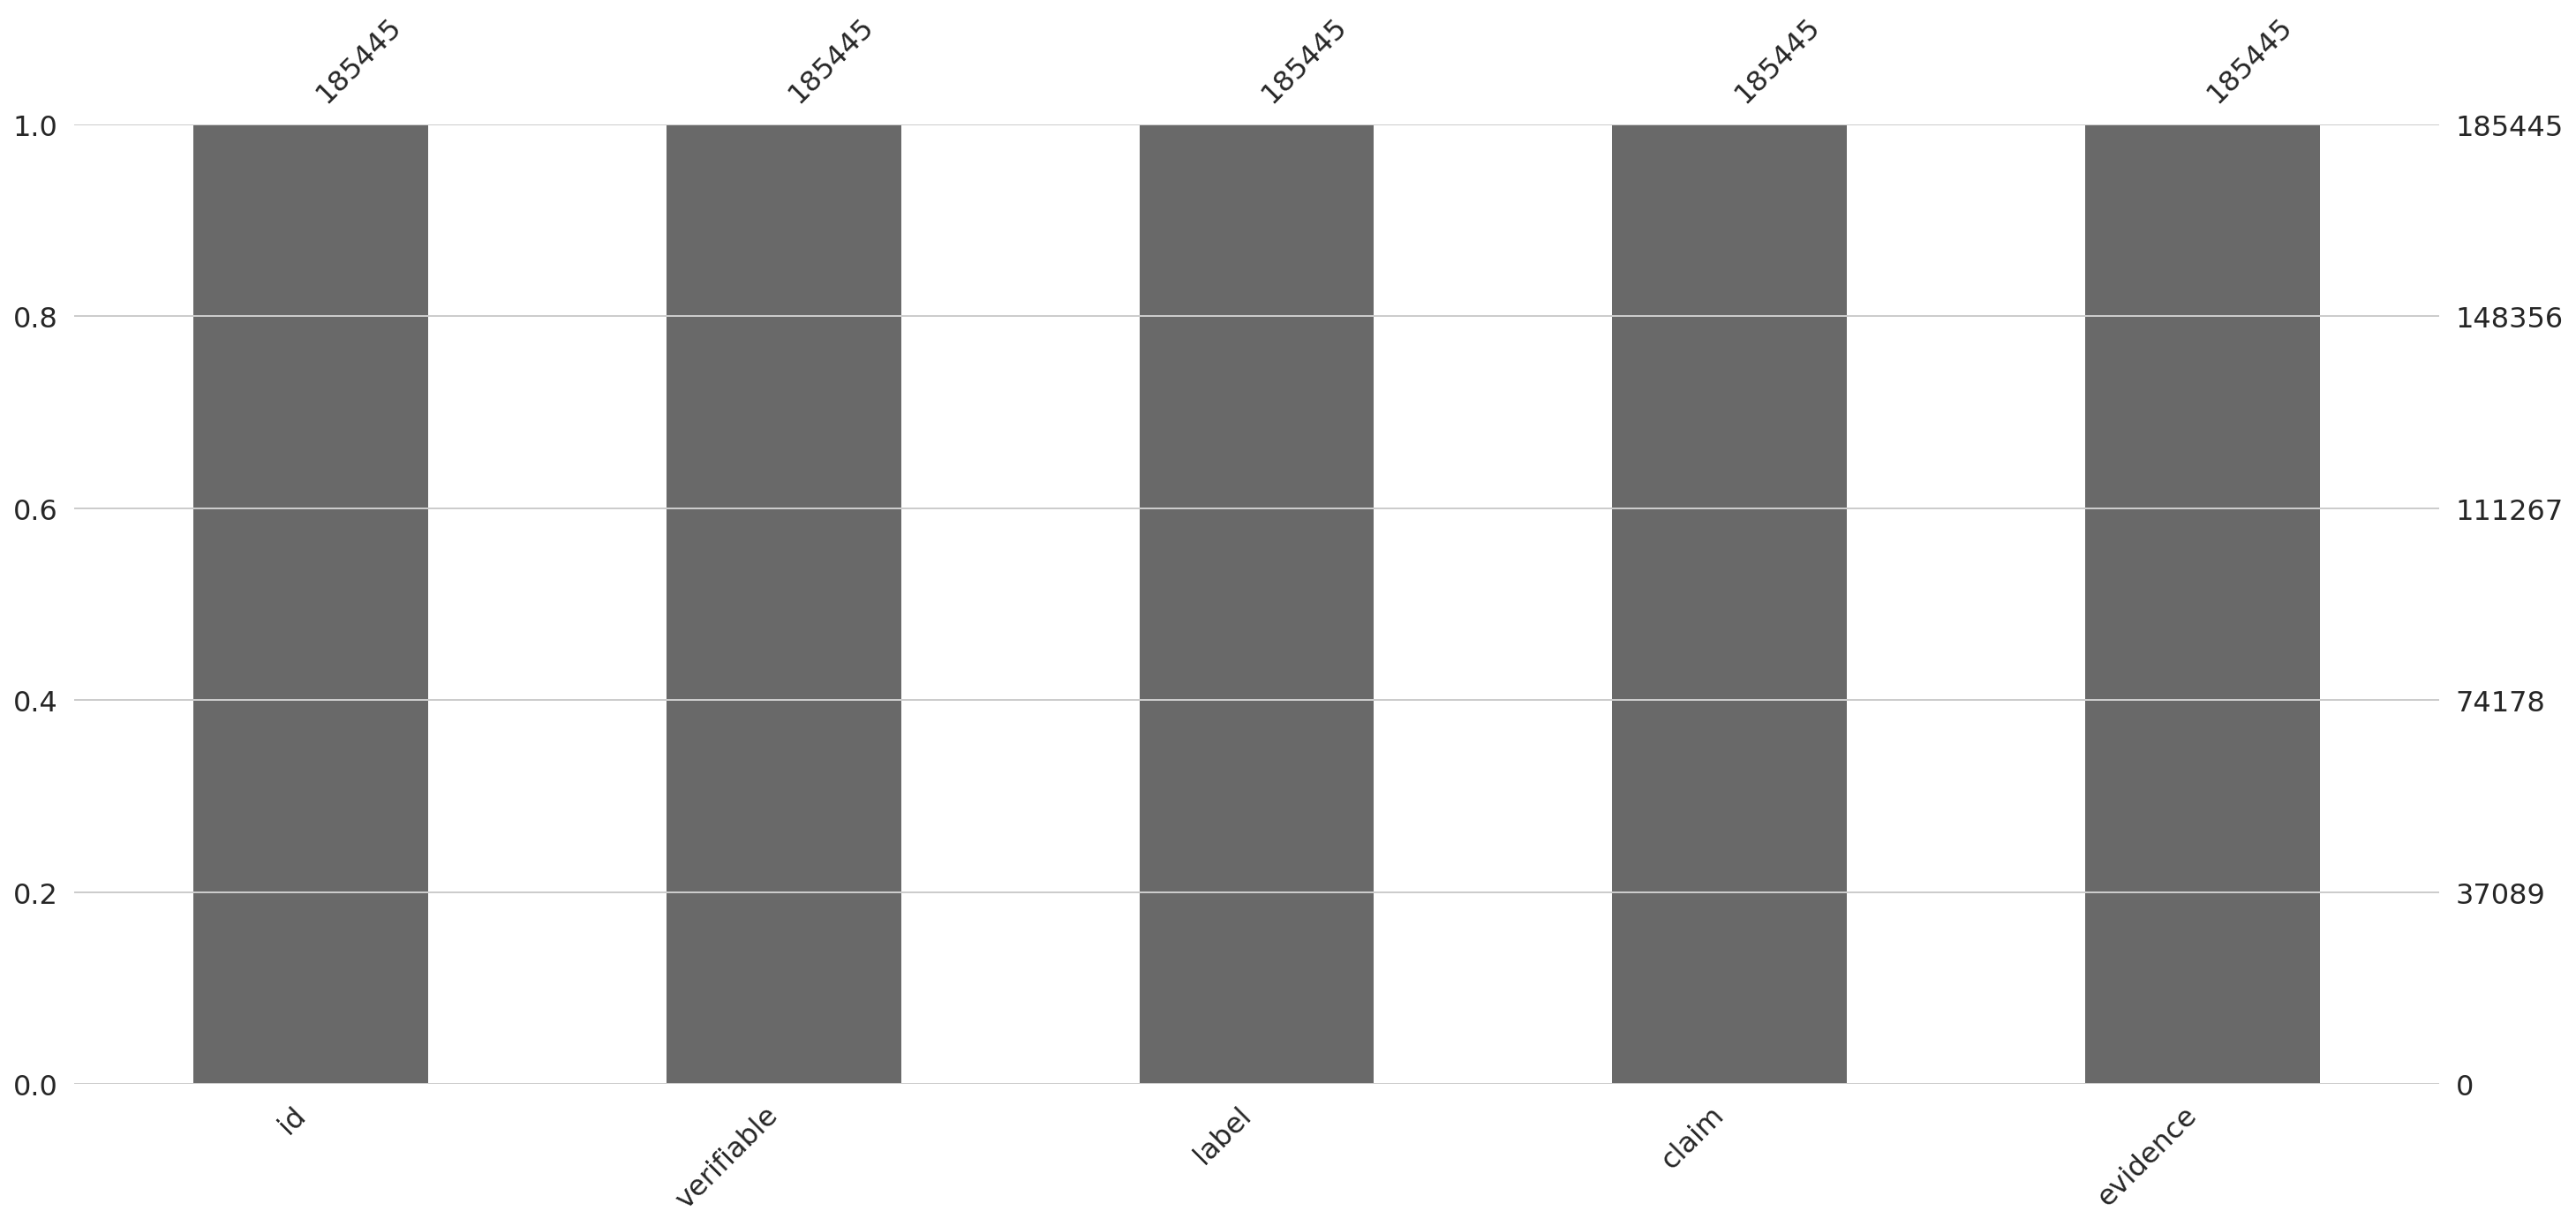

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df[['id', 'verifiable', 'label', 'claim']].duplicated().any()

True

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'id', 'evidence'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'claim'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'label' # attribute considered as "label"

### Label attribute distribution

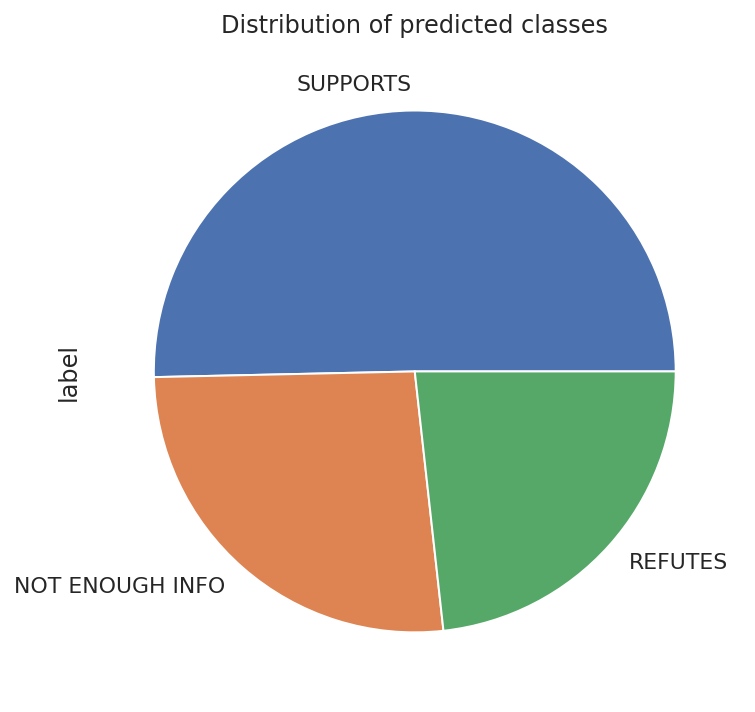

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

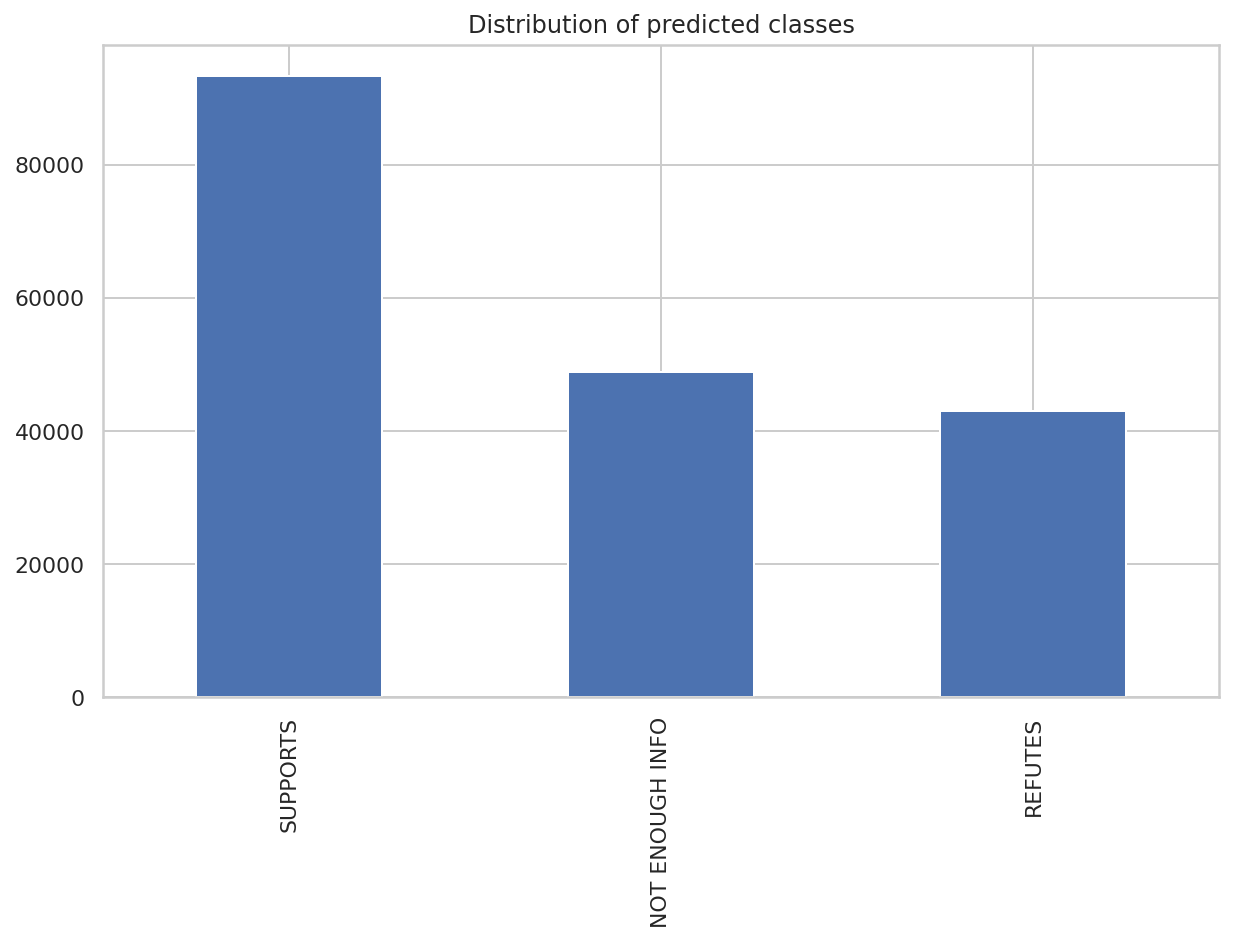

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

There are no attributes to be analysed.


### Categorical attributes

Analysis of categorical attributes:



Analysis of attribute "verifiable"


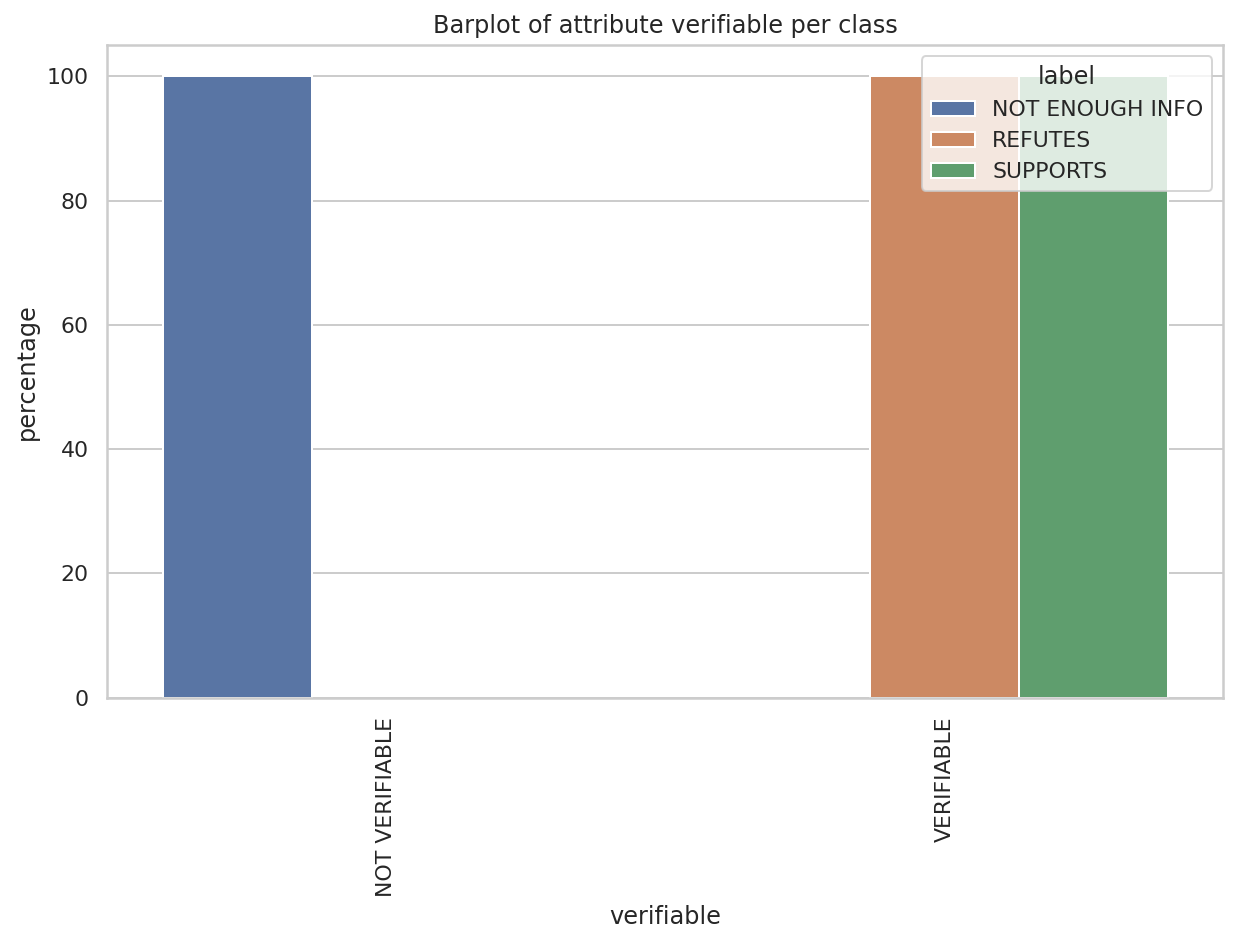

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "claim"


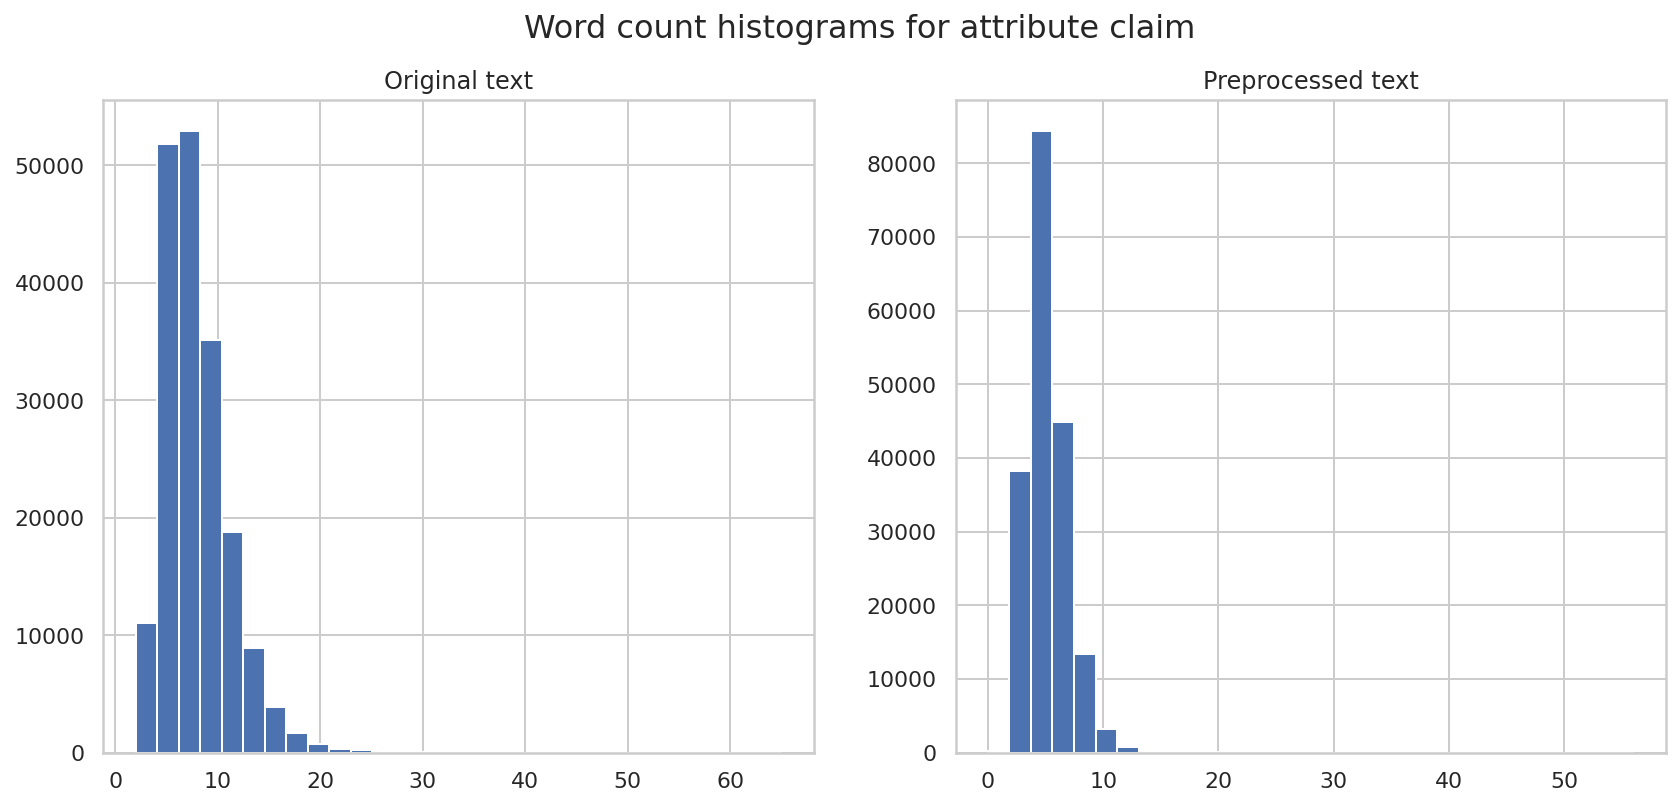

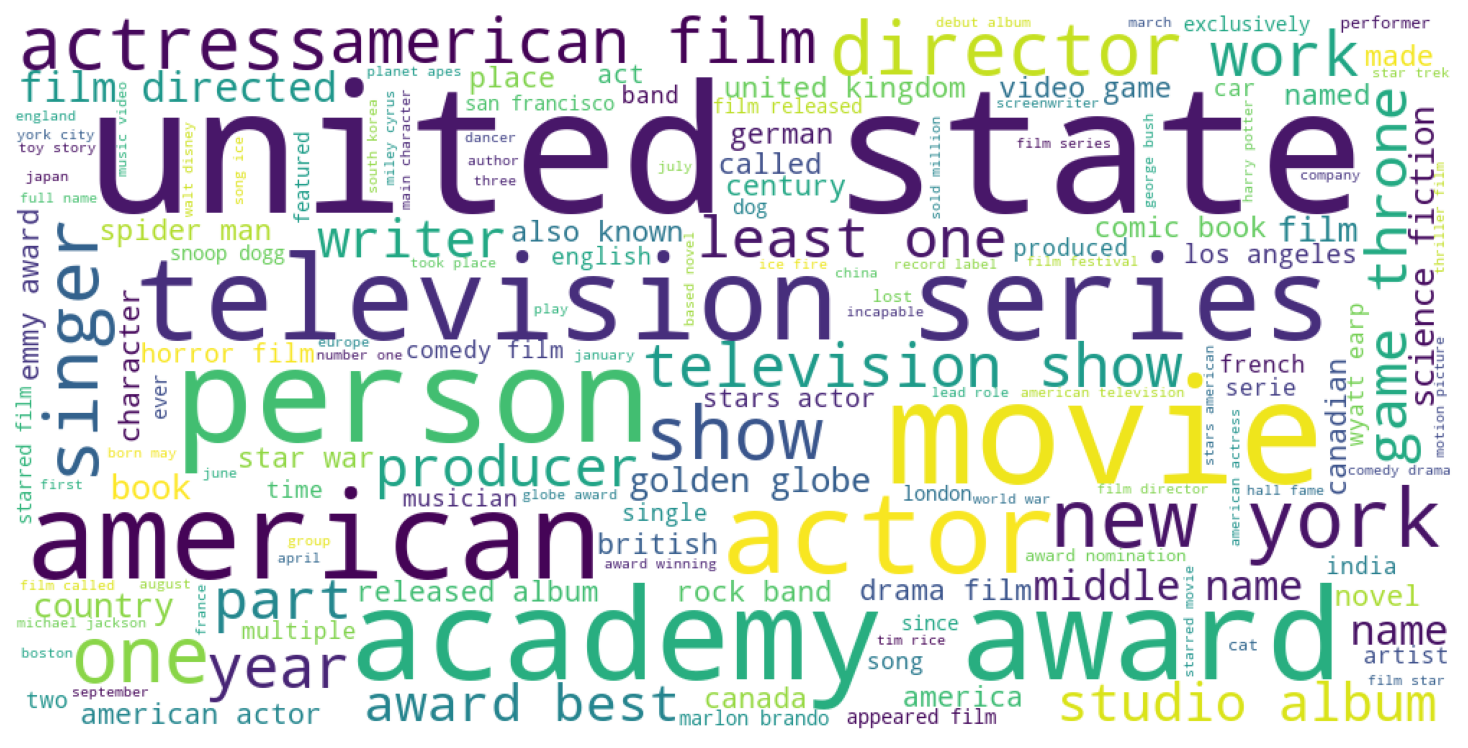

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)